In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import thư viện**

In [98]:
import numpy as np                                                 
import pandas as pd                                                
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
%matplotlib inline
sns.set()


In [99]:
cd /content/drive/MyDrive/CV/KNN_WineQuality

/content/drive/MyDrive/CV/KNN_WineQuality


**Import dữ liệu**

In [100]:
#read the red wine report
file = "winequality-red.csv"
redwine_data = pd.read_csv(file)     

#Read the white wine data
file = "winequality-white.csv"
whitewine_data = pd.read_csv(file)


**Xử lý dữ liệu file Red_Wine**

In [101]:
#Thêm cột Type vào dữ liệu
redwine_data["Type"] = "Red"
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


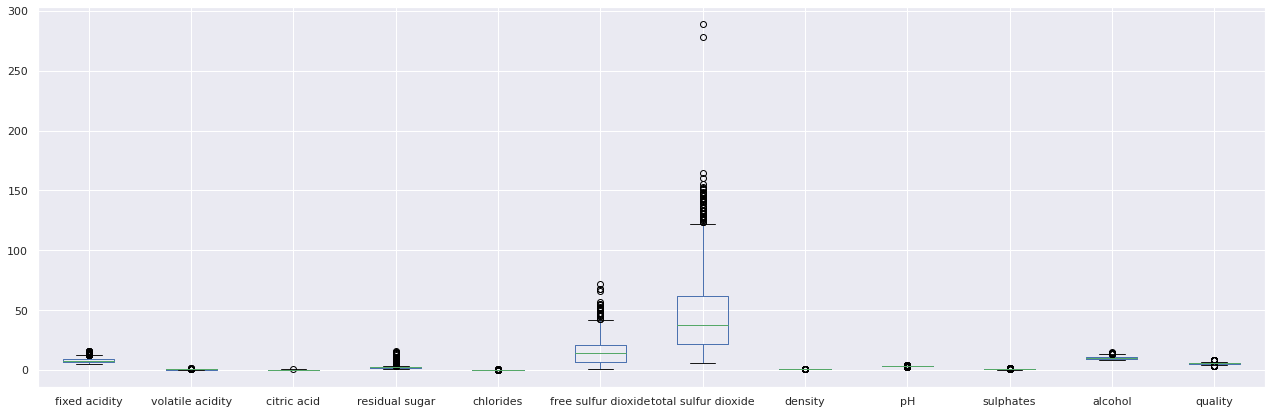

In [102]:
f,ax = plt.subplots(figsize=(22,7))
ax = redwine_data.plot.box(ax=ax)

Giá trị ngoại lệ thấy ở cột  ***free suphur , total sulfur dioxide,residual sugar, chlorides, sulphates, citric acid, fixed acidity***

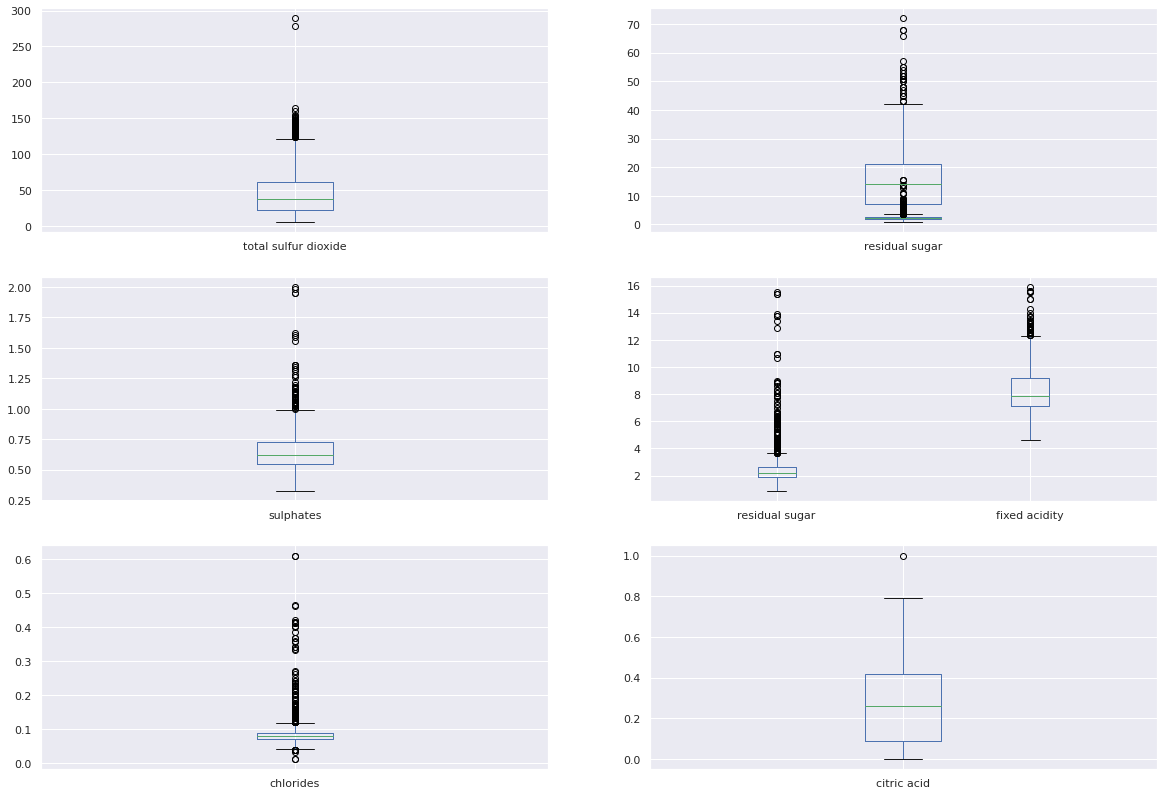

In [103]:
f,ax = plt.subplots(3,2,figsize=(20,14))
ax[0,0] = redwine_data[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = redwine_data[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
ax[0,1] = redwine_data[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = redwine_data[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = redwine_data[["residual sugar","fixed acidity"]].plot.box(ax=ax[1,1])
ax[2,0] = redwine_data[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = redwine_data[["citric acid"]].plot.box(ax=ax[2,1])

In [104]:
# Xử lý ngoại lệ
# 1. total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 125.0

TotalRedWines = redwine_data[colname].count()
TotalActRedWines = TotalRedWines
print(TotalRedWines)

TotalOutliers = redwine_data[colname][redwine_data[colname] > outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_data[redwine_data[colname]<=outliervalue].copy()

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 2. free sulfur dioxide
colname = "free sulfur dioxide"
outliervalue = 45.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 3. sulphates
colname = "sulphates"
outliervalue = 1.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 4. residual sugar
colname = "residual sugar"
outliervalue = 4.8

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 5. fixed acidity
colname = "fixed acidity"
outliervalue = 12.0

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 6. chlorides
colname = "chlorides"
outliervalue = 0.15

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 7. citric acid
colname = "citric acid"
outliervalue = 0.8

TotalRedWines = redwine_datacleaned[colname].count()
TotalOutliers = redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

redwine_datacleaned = redwine_datacleaned[redwine_datacleaned[colname]<=outliervalue]

print("After clean",redwine_datacleaned[colname][redwine_datacleaned[colname]>outliervalue].count())
print("After clean count=",redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-redwine_datacleaned[colname][redwine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

print("Original Count=",TotalActRedWines)
print("After Cleanup Count=",TotalRedWines)
print("After Removal Percentage=",round((TotalActRedWines-TotalRedWines)/TotalActRedWines*100,2))

1599
50
total sulfur dioxide - outliers percentage= 3.13
After clean 0
After clean count= 1549
Removal percentage= 3.13
19
free sulfur dioxide - outliers percentage= 1.23
After clean 0
After clean count= 1530
Removal percentage= 1.23
51
sulphates - outliers percentage= 3.33
After clean 0
After clean count= 1479
Removal percentage= 3.33
66
residual sugar - outliers percentage= 4.46
After clean 0
After clean count= 1413
Removal percentage= 4.46
53
fixed acidity - outliers percentage= 3.75
After clean 0
After clean count= 1360
Removal percentage= 3.75
34
chlorides - outliers percentage= 2.5
After clean 0
After clean count= 1326
Removal percentage= 2.5
0
citric acid - outliers percentage= 0.0
After clean 0
After clean count= 1326
Removal percentage= 0.0
Original Count= 1599
After Cleanup Count= 1326
After Removal Percentage= 17.07


*Dữ liệu sau khi xử lý ngoại lệ*

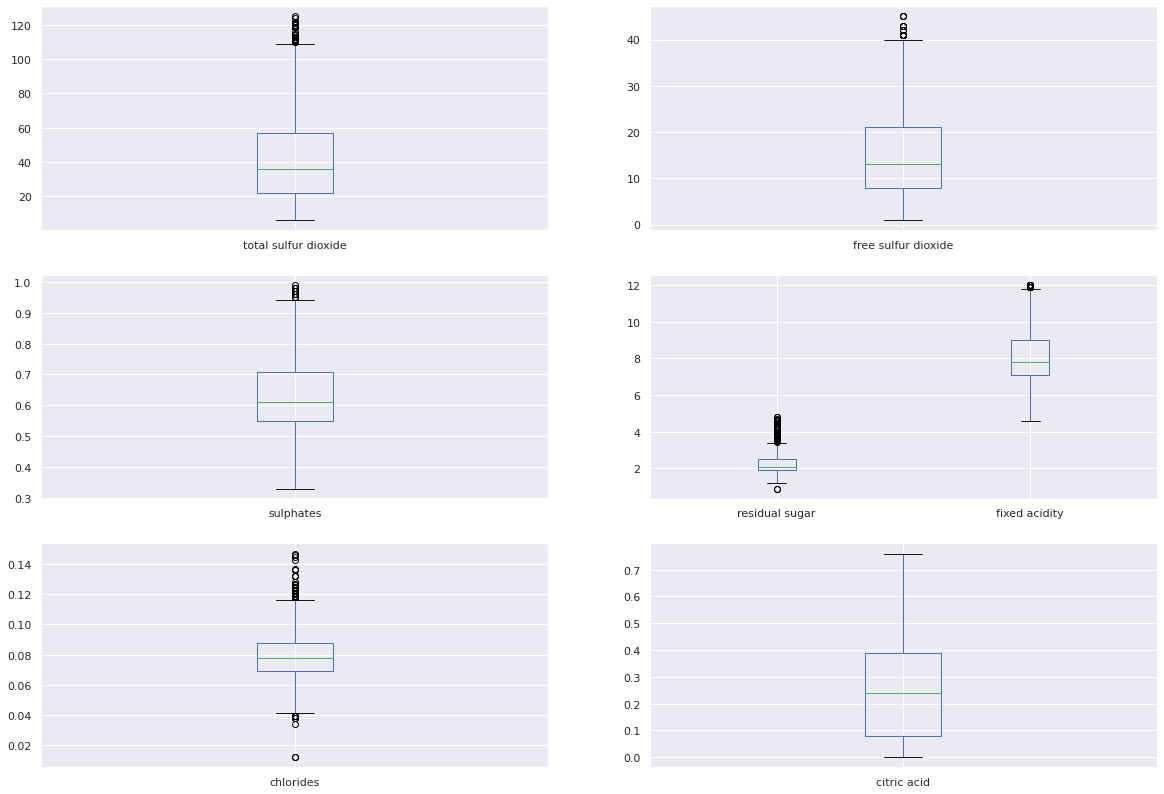

In [105]:
f,ax = plt.subplots(3,2,figsize=(20,14))
ax[0,0] = redwine_datacleaned[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = redwine_datacleaned[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = redwine_datacleaned[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = redwine_datacleaned[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = redwine_datacleaned[["residual sugar","fixed acidity"]].plot.box(ax=ax[1,1])
ax[2,0] = redwine_datacleaned[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = redwine_datacleaned[["citric acid"]].plot.box(ax=ax[2,1])

**Xử lý dữ liệu tương tự đối với file White_Wine**

In [106]:
whitewine_data["Type"] = "White"
whitewine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


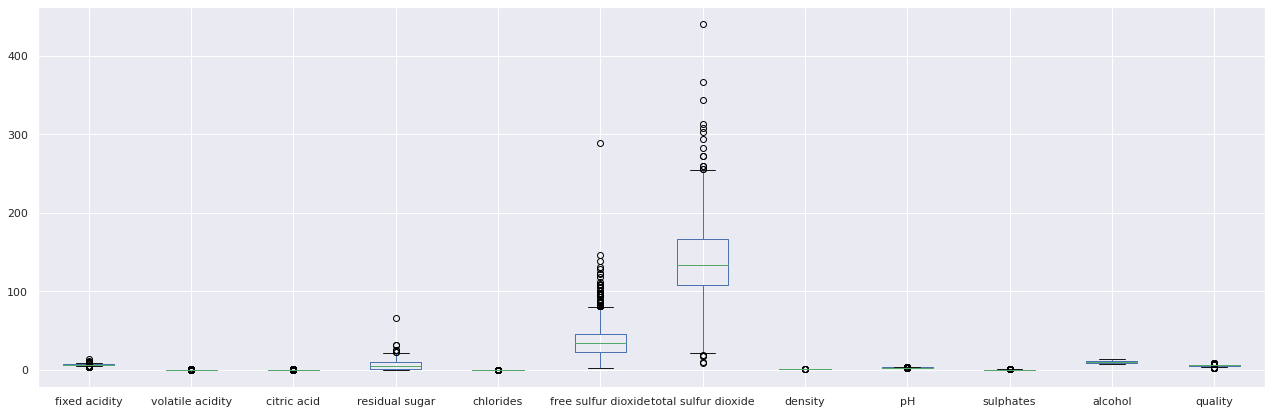

In [107]:
f,ax = plt.subplots(figsize=(22,7))
ax = whitewine_data.plot.box(ax=ax)

Giá trị ngoại lệ thấy ở cột **free suphur , total sulfur dioxide,residual sugar, chlorides, sulphates, citric acid và fixed acidity**

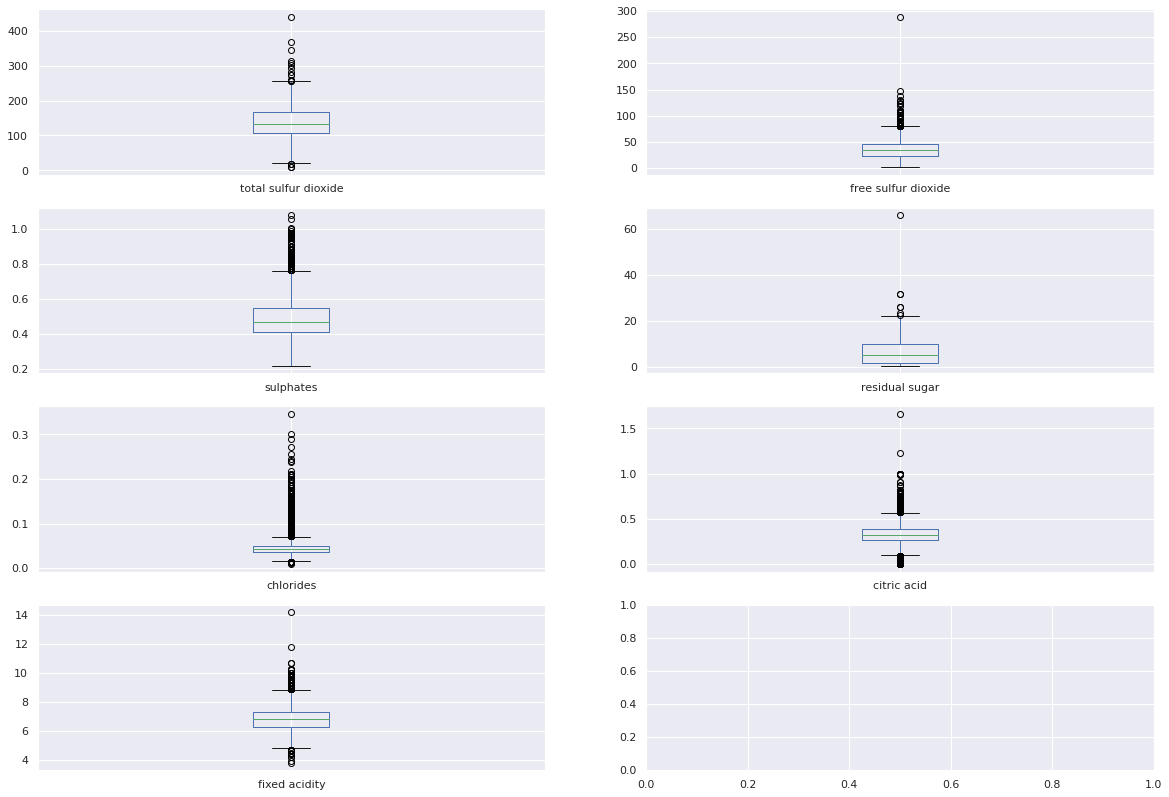

In [108]:
f,ax = plt.subplots(4,2,figsize=(20,14))
ax[0,0] = whitewine_data[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = whitewine_data[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = whitewine_data[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = whitewine_data[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = whitewine_data[["residual sugar"]].plot.box(ax=ax[1,1])
ax[2,0] = whitewine_data[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = whitewine_data[["citric acid"]].plot.box(ax=ax[2,1])
ax[3,0] = whitewine_data[["fixed acidity"]].plot.box(ax=ax[3,0])
# ax[3,1] = whitewine_data[["fixed acidity"]].plot.box(ax=ax[3,1])

In [109]:
# Xử lý ngoại lệ
# 1. total sulfur dioxide
colname = "total sulfur dioxide"
outliervalue = 260.0

TotalRedWines = whitewine_data[colname].count()
TotalActRedWines = TotalRedWines
print(TotalRedWines)

TotalOutliers = whitewine_data[colname][whitewine_data[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_data[whitewine_data[colname]<=outliervalue].copy()

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 2. free sulfur dioxide
colname = "free sulfur dioxide"
outliervalue = 80.0

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 3. sulphates
colname = "sulphates"
outliervalue = 0.7

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 4. residual sugar
colname = "residual sugar"
outliervalue = 25.0

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 5. fixed acidity
colname = "fixed acidity"
outliervalue = 9.7

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 6. chlorides
colname = "chlorides"
outliervalue = 0.08

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

# 7. citric acid
colname = "citric acid"
outliervalue = 0.65

TotalRedWines = whitewine_datacleaned[colname].count()
TotalOutliers = whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count()
print(TotalOutliers)
print(colname ,"- outliers percentage=",round(TotalOutliers/TotalRedWines*100,2))

whitewine_datacleaned = whitewine_datacleaned[whitewine_datacleaned[colname]<=outliervalue]

print("After clean",whitewine_datacleaned[colname][whitewine_datacleaned[colname]>outliervalue].count())
print("After clean count=",whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
print("Removal percentage=",round((TotalRedWines-whitewine_datacleaned[colname][whitewine_datacleaned[colname]<=outliervalue].count())
                                   /TotalRedWines*100,2))

print("Original Count=",TotalActRedWines)
print("After Cleanup Count=",TotalRedWines)
print("After Removal Percentage=",round((TotalActRedWines-TotalRedWines)/TotalActRedWines*100,2))

4898
10
total sulfur dioxide - outliers percentage= 0.2
After clean 0
After clean count= 4888
Removal percentage= 0.2
46
free sulfur dioxide - outliers percentage= 0.94
After clean 0
After clean count= 4842
Removal percentage= 0.94
240
sulphates - outliers percentage= 4.96
After clean 0
After clean count= 4602
Removal percentage= 4.96
5
residual sugar - outliers percentage= 0.11
After clean 0
After clean count= 4597
Removal percentage= 0.11
20
fixed acidity - outliers percentage= 0.44
After clean 0
After clean count= 4577
Removal percentage= 0.44
158
chlorides - outliers percentage= 3.45
After clean 0
After clean count= 4419
Removal percentage= 3.45
81
citric acid - outliers percentage= 1.83
After clean 0
After clean count= 4338
Removal percentage= 1.83
Original Count= 4898
After Cleanup Count= 4419
After Removal Percentage= 9.78


*Dữ liệu sau khi xử lý ngoại lệ*

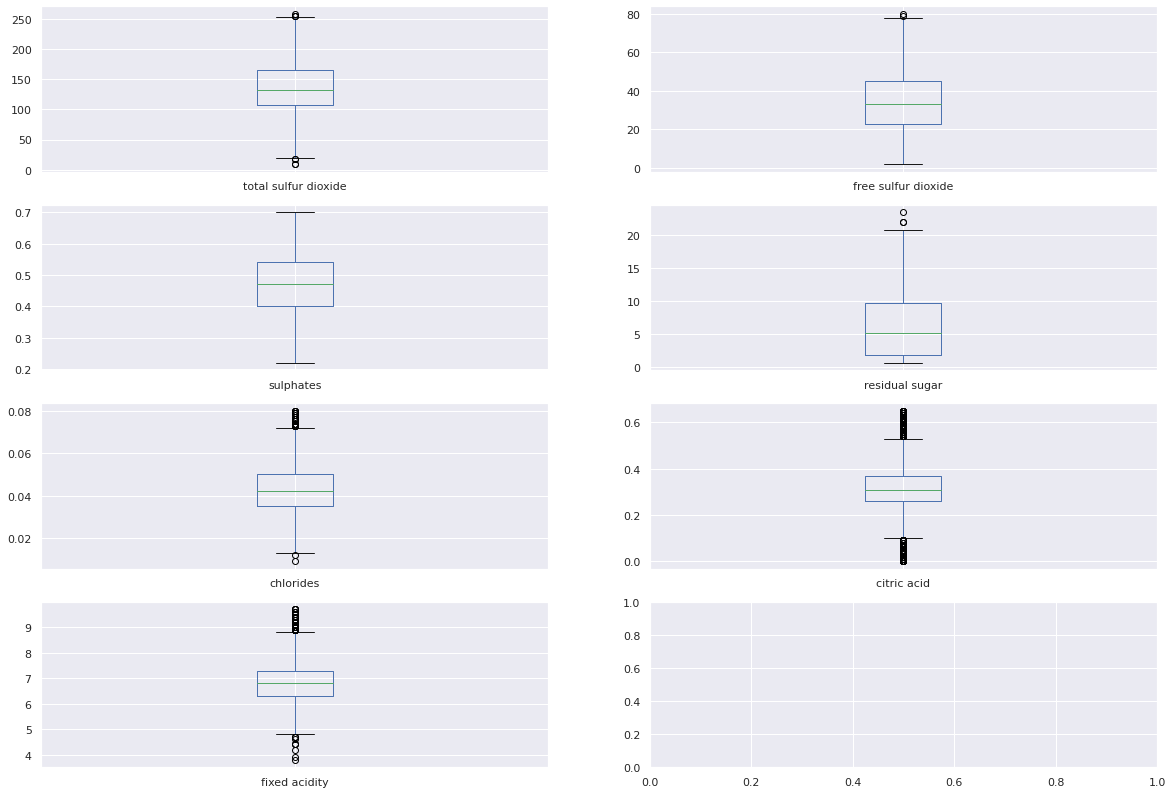

In [110]:
f,ax = plt.subplots(4,2,figsize=(20,14))
ax[0,0] = whitewine_datacleaned[["total sulfur dioxide"]].plot.box(ax=ax[0,0])
ax[0,1] = whitewine_datacleaned[["free sulfur dioxide"]].plot.box(ax=ax[0,1])
#ax[0,1] = whitewine_datacleaned[["residual sugar"]].plot.box(ax=ax[0,1])
ax[1,0] = whitewine_datacleaned[["sulphates"]].plot.box(ax=ax[1,0])
ax[1,1] = whitewine_datacleaned[["residual sugar"]].plot.box(ax=ax[1,1])
ax[2,0] = whitewine_datacleaned[["chlorides"]].plot.box(ax=ax[2,0])
ax[2,1] = whitewine_datacleaned[["citric acid"]].plot.box(ax=ax[2,1])
ax[3,0] = whitewine_datacleaned[["fixed acidity"]].plot.box(ax=ax[3,0])
# ax[3,1] = whitewine_datacleaned[["fixed acidity"]].plot.box(ax=ax[3,1])

**Ghép 2 file dữ liệu Red và White**

In [111]:
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,Red


In [112]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [113]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [114]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

*Không có giá trị nào null*

quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64


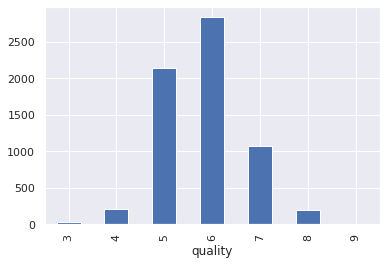

In [115]:
qlty=wine_data['quality'].groupby(wine_data['quality']).count()
print(qlty)
qlty.plot.bar()


Dữ liệu phân bố không đều, bị lệch nhiều về giá trị 5, 6, 7

In [116]:
# Mã hóa cột Type
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

wine_data['Type'] = le.fit_transform(wine_data['Type'].values)
wine_data.Type.unique()

array([0, 1])

# **1. So sánh Bayes và kNN với dữ liệu chưa xử lý ngoại lệ và chưa scale**

In [117]:
# Sử dụng dữ liệu chưa xử lý ngoại lệ
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)

In [118]:

temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine.skew()
#label quality column
label = temp_wine.pop('quality')

In [119]:
# Train-Test split 
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)


**1.1 KNN model**

In [120]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') 

In [121]:
knn.fit(data_train, label_train)

KNeighborsClassifier(n_neighbors=7)

In [122]:
y_preds = knn.predict(data_test)

In [123]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.46615384615384614


*Thử các giá trị k khác xem accuracy có tăng lên không*

Accuracy score for the KNN model with n_neighbors= 4 : 0.4823076923076923
Accuracy score for the KNN model with n_neighbors= 5 : 0.45384615384615384
Accuracy score for the KNN model with n_neighbors= 6 : 0.4492307692307692
Accuracy score for the KNN model with n_neighbors= 7 : 0.46615384615384614
Accuracy score for the KNN model with n_neighbors= 8 : 0.4676923076923077
Accuracy score for the KNN model with n_neighbors= 9 : 0.46
Accuracy score for the KNN model with n_neighbors= 10 : 0.46153846153846156
Accuracy score for the KNN model with n_neighbors= 11 : 0.46
Accuracy score for the KNN model with n_neighbors= 12 : 0.47307692307692306
Accuracy score for the KNN model with n_neighbors= 13 : 0.46153846153846156
Accuracy score for the KNN model with n_neighbors= 14 : 0.4623076923076923
Accuracy score for the KNN model with n_neighbors= 15 : 0.4530769230769231
Accuracy score for the KNN model with n_neighbors= 16 : 0.46153846153846156
Accuracy score for the KNN model with n_neighbors= 17

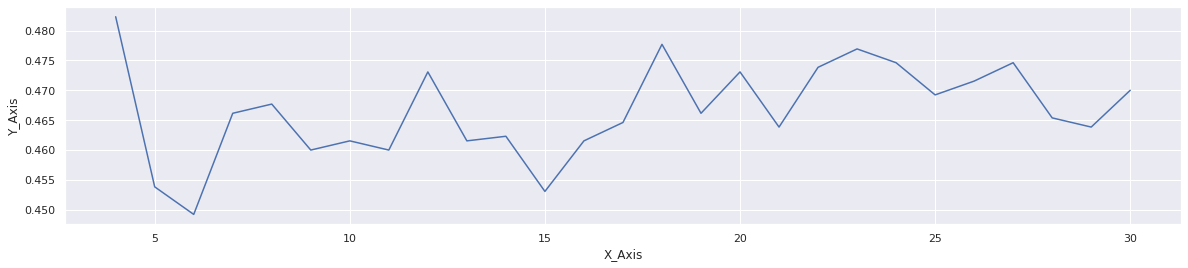

In [124]:
xAxis = list()
yAxis = list()
for i in range(4,31,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 
  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(knn_accuracy)
  print('Accuracy score for the KNN model with n_neighbors=', i,":",knn_accuracy)

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(20,4))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

#store the max accuracy of the KNN model
knn_accuracy = max(yAxis)

#sinplot()

**1.2 Bayes model**

In [125]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()


In [126]:
bayes.fit(data_train, label_train)

GaussianNB()

In [127]:
y_pred = bayes.predict(data_test)

In [128]:
from sklearn.metrics import accuracy_score
bayes_accuracy = accuracy_score(label_test, y_pred)
print('Accuracy score for the Bayes model:', bayes_accuracy)

Accuracy score for the Bayes model: 0.46923076923076923


**1.3. So sánh**

In [129]:
models = pd.DataFrame({
        'ModelName'         : ['Model 1'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['No'],
        'Added Category?'   : ['No'],
        'Bayes_score'       : [bayes_accuracy],
        'KNN_score'         : [knn_accuracy]
    })
models.sort_values(by='ModelName', ascending=True)

,ModelName,Scaled?,Outliers?,Include Type?,Added Category?,Bayes_score,KNN_score
0,Model 1,No,No,No,No,0.469231,0.482308


# **2. So sánh Bayes và kNN với dữ liệu chưa xử lý ngoại lệ, chưa scale, gồm cột Type và chia cột Quality thành 3 nhóm giá trị (Kém: 1, Trung bình: 2, Tốt: 3)**

In [130]:
wine_data = pd.concat([redwine_data, whitewine_data], ignore_index=True)

wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)

In [131]:
wine_data[wine_data.qualityclass==3].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,qualityclass
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red,3
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red,3


In [132]:
wine_data[wine_data.qualityclass==2].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,qualityclass
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,2
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,2


In [133]:
wine_data[wine_data.qualityclass==1].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type,qualityclass
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,Red,1
517,10.4,0.61,0.49,2.1,0.200,5.0,16.0,0.9994,3.16,0.63,8.4,3,Red,1


In [134]:
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)

In [135]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityclass,Type_White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0


In [136]:
wine_data[wine_data.Type_White==1].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityclass,Type_White
1599,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,2,1
1600,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,2,1


In [137]:
wine_data[wine_data.Type_White==0].head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualityclass,Type_White
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2,0


**2.1. KNN**

In [138]:
#remove quality and type and keep qualityclass and Type_White dummies
temp_wine = wine_data.loc[:,wine_data.columns != 'quality']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'Type']
#temp_wine.skew()

label = temp_wine.pop('qualityclass')

#Train/Test data and check shape
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))



There are 5197 samples in the training set and 1300 samples in the test set


In [139]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') 

knn.fit(data_train, label_train)

y_preds = knn.predict(data_test)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.7915384615384615


Accuracy score for the KNN model with n_neighbors= 4 : 0.8038
Accuracy score for the KNN model with n_neighbors= 5 : 0.7892
Accuracy score for the KNN model with n_neighbors= 6 : 0.7938
Accuracy score for the KNN model with n_neighbors= 7 : 0.7915
Accuracy score for the KNN model with n_neighbors= 8 : 0.8031
Accuracy score for the KNN model with n_neighbors= 9 : 0.7985
Accuracy score for the KNN model with n_neighbors= 10 : 0.7992
Accuracy score for the KNN model with n_neighbors= 11 : 0.7938
Accuracy score for the KNN model with n_neighbors= 12 : 0.7931
Accuracy score for the KNN model with n_neighbors= 13 : 0.7946
Accuracy score for the KNN model with n_neighbors= 14 : 0.8008
Accuracy score for the KNN model with n_neighbors= 15 : 0.7985
Accuracy score for the KNN model with n_neighbors= 16 : 0.7954
Accuracy score for the KNN model with n_neighbors= 17 : 0.7962
Accuracy score for the KNN model with n_neighbors= 18 : 0.8
Accuracy score for the KNN model with n_neighbors= 19 : 0.7985
A

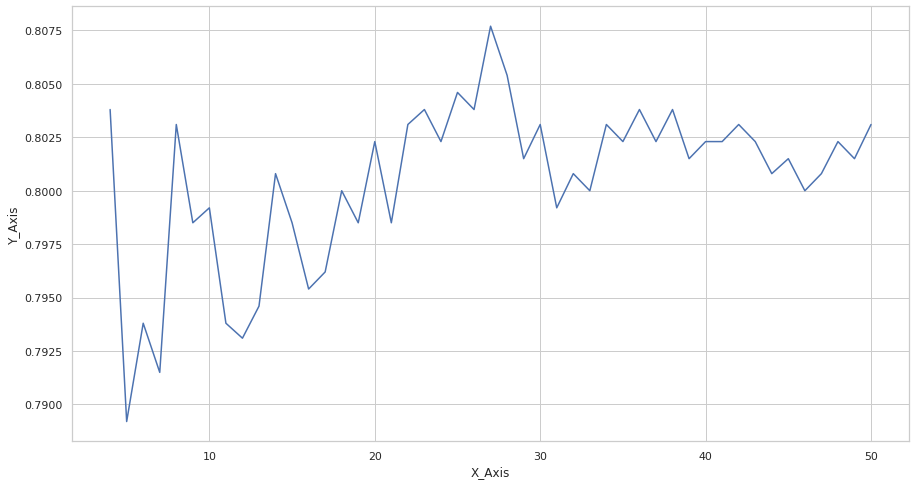

In [140]:
xAxis = list()
yAxis = list()
for i in range(4,51,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})

#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)
#sinplot()

**2.2 Bayes**

In [141]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

In [142]:
bayes.fit(data_train, label_train)

GaussianNB()

In [143]:
y_pred = bayes.predict(data_test)

In [144]:
from sklearn.metrics import accuracy_score
bayes_accuracy = accuracy_score(label_test, y_pred)
print('Accuracy score for the Bayes model:', bayes_accuracy)

Accuracy score for the Bayes model: 0.7261538461538461


**2.3 So sánh**

In [145]:
model2 = pd.DataFrame({
        'ModelName'         : ['Model 2'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['No'],
        'Include Type?'     : ['Yes'],
        'Added Category?'   : ['Yes'],
        'Bayes_score'       : [bayes_accuracy],
        'KNN_score'         : [knn_accuracy]
    })
models = models.append(model2,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Category?,Bayes_score,KNN_score
0,Model 1,No,No,No,No,0.469231,0.482308
1,Model 2,No,No,Yes,Yes,0.726154,0.807700


# **3. So sánh Bayes và kNN với dữ liệu đã xử lý ngoại lệ, chưa scale**

In [146]:
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)
wine_data.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,Red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,Red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,Red
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,Red


In [147]:
#remove type and just keep quality as label
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,temp_wine.columns != 'Type']

#Label the quality column
label = temp_wine.pop('quality')


In [148]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


**3.1 KNN**

In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') 

In [150]:
#Fit the Model
knn.fit(data_train, label_train)

KNeighborsClassifier(n_neighbors=7)

In [151]:
#Use the model for prediction
y_preds = knn.predict(data_test)

In [152]:
#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.47572815533980584


Accuracy score for the KNN model with n_neighbors= 4 : 0.4837
Accuracy score for the KNN model with n_neighbors= 5 : 0.4775
Accuracy score for the KNN model with n_neighbors= 6 : 0.466
Accuracy score for the KNN model with n_neighbors= 7 : 0.4757
Accuracy score for the KNN model with n_neighbors= 8 : 0.4678
Accuracy score for the KNN model with n_neighbors= 9 : 0.4722
Accuracy score for the KNN model with n_neighbors= 10 : 0.4722
Accuracy score for the KNN model with n_neighbors= 11 : 0.4784
Accuracy score for the KNN model with n_neighbors= 12 : 0.4784
Accuracy score for the KNN model with n_neighbors= 13 : 0.4801
Accuracy score for the KNN model with n_neighbors= 14 : 0.474
Accuracy score for the KNN model with n_neighbors= 15 : 0.4731
Accuracy score for the KNN model with n_neighbors= 16 : 0.4713
Accuracy score for the KNN model with n_neighbors= 17 : 0.4784
Accuracy score for the KNN model with n_neighbors= 18 : 0.474
Accuracy score for the KNN model with n_neighbors= 19 : 0.4722
A

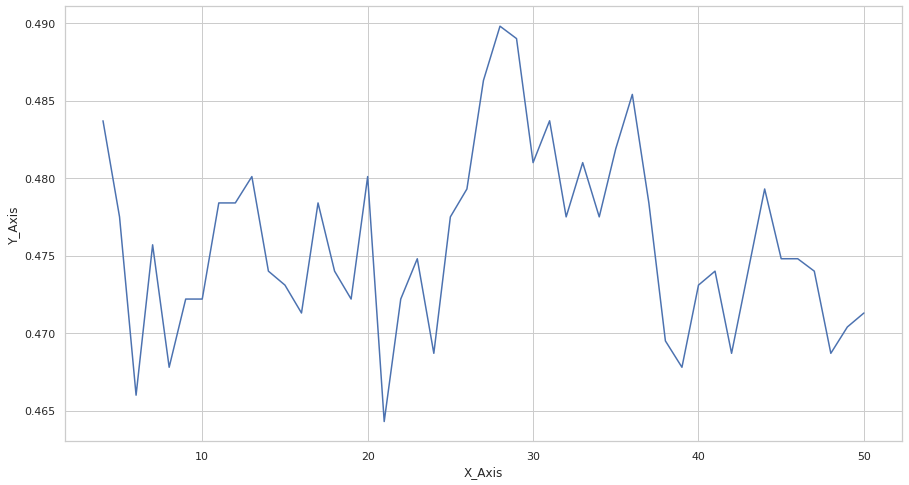

In [153]:
xAxis = list()
yAxis = list()
for i in range(4,51,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})

#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

**3.2 Bayes**

In [154]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

In [155]:
bayes.fit(data_train, label_train)

GaussianNB()

In [156]:
y_pred = bayes.predict(data_test)

In [157]:
from sklearn.metrics import accuracy_score
bayes_accuracy = accuracy_score(label_test, y_pred)
print('Accuracy score for the Bayes model:', bayes_accuracy)

Accuracy score for the Bayes model: 0.45366284201235657


**3.3 So sánh**

In [158]:
model3 = pd.DataFrame({
        'ModelName'         : ['Model 3'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['No'],
        'Added Category?'   : ['No'],
        'Bayes_score'       : [bayes_accuracy],
        'KNN_score'         : [knn_accuracy]
    })
models = models.append(model3,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Category?,Bayes_score,KNN_score
0,Model 1,No,No,No,No,0.469231,0.482308
1,Model 2,No,No,Yes,Yes,0.726154,0.807700
2,Model 3,No,Yes,No,No,0.453663,0.489800


# **4. So sánh Bayes và kNN với dữ liệu đã xử lý ngoại lệ, chưa scale, gồm cột Type và chia cột Quality thành 3 nhóm giá trị (Kém: 1, Trung bình: 2, Tốt: 3)**

In [159]:
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)

In [160]:
#create the 3 new category
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)

In [161]:
#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,wine_data.columns != 'quality']

#Label the qualityclass column
label = temp_wine.pop('qualityclass')


In [162]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(temp_wine, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


 **4.1 KNN**

In [163]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') 

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8049426301853486


Accuracy score for the KNN model with n_neighbors= 4 : 0.8155
Accuracy score for the KNN model with n_neighbors= 5 : 0.7979
Accuracy score for the KNN model with n_neighbors= 6 : 0.812
Accuracy score for the KNN model with n_neighbors= 7 : 0.8049
Accuracy score for the KNN model with n_neighbors= 8 : 0.8076
Accuracy score for the KNN model with n_neighbors= 9 : 0.8067
Accuracy score for the KNN model with n_neighbors= 10 : 0.7979
Accuracy score for the KNN model with n_neighbors= 11 : 0.7952
Accuracy score for the KNN model with n_neighbors= 12 : 0.8014
Accuracy score for the KNN model with n_neighbors= 13 : 0.7979
Accuracy score for the KNN model with n_neighbors= 14 : 0.8041
Accuracy score for the KNN model with n_neighbors= 15 : 0.7917
Accuracy score for the KNN model with n_neighbors= 16 : 0.8049
Accuracy score for the KNN model with n_neighbors= 17 : 0.797
Accuracy score for the KNN model with n_neighbors= 18 : 0.8041
Accuracy score for the KNN model with n_neighbors= 19 : 0.797
A

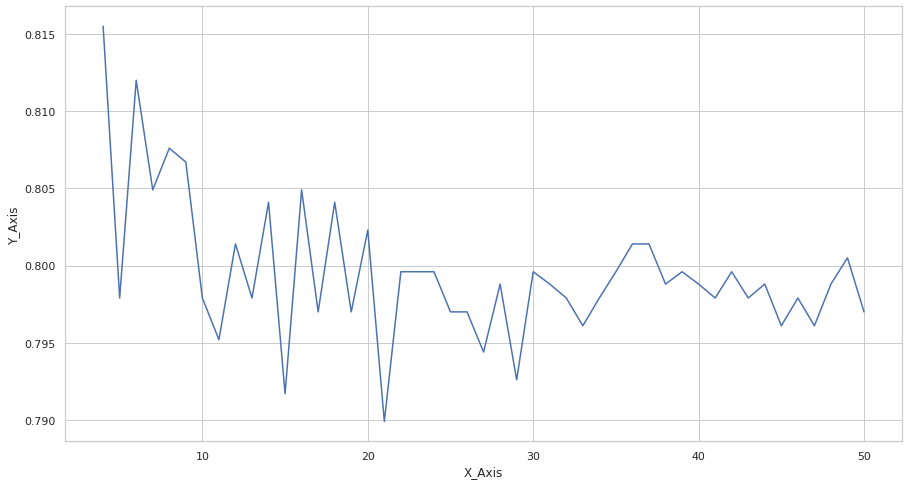

In [164]:
#TRYING DIFFERENT NEIGHBOURS
xAxis = list()
yAxis = list()
for i in range(4,51,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

**4.2 Bayes**

In [165]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

bayes.fit(data_train, label_train)

y_pred = bayes.predict(data_test)

from sklearn.metrics import accuracy_score
bayes_accuracy = accuracy_score(label_test, y_pred)
print('Accuracy score for the Bayes model:', bayes_accuracy)

Accuracy score for the Bayes model: 0.6954986760812003


**4.3 So sánh**

In [166]:
model4 = pd.DataFrame({
        'ModelName'         : ['Model 4'],
        'Scaled?'           : ['No'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Category?'   : ['Yes'],
        'Bayes_score'       : [bayes_accuracy],
        'KNN_score'         : [knn_accuracy]
    })
models = models.append(model4,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Category?,Bayes_score,KNN_score
0,Model 1,No,No,No,No,0.469231,0.482308
1,Model 2,No,No,Yes,Yes,0.726154,0.807700
2,Model 3,No,Yes,No,No,0.453663,0.489800
3,Model 4,No,Yes,Yes,Yes,0.695499,0.815500


# **5. So sánh Bayes và kNN với dữ liệu đã xử lý ngoại lệ, đã scale, gồm cột Type và chia cột Quality thành 3 nhóm giá trị (Kém: 1, Trung bình: 2, Tốt: 3)**

In [167]:
wine_data = pd.concat([redwine_datacleaned, whitewine_datacleaned], ignore_index=True)

#Get dummies for Type
wine_data = pd.get_dummies(wine_data, columns=['Type'], drop_first=True)

#create the 3 new category
wine_data['qualityclass'] = wine_data.apply(lambda x: 1 if x['quality'] <= 3 else 2 if (x['quality'] > 3 and x['quality'] <= 6) else 3,axis=1)

In [168]:
#Remove type after dummification
temp_wine = wine_data.loc[:,wine_data.columns != 'Type']
temp_wine = temp_wine.loc[:,wine_data.columns != 'quality']

#Label the qualityclass column
label = temp_wine.pop('qualityclass')


In [169]:
# Using StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(temp_wine)                                                                                 # fit the data to Standardscaler

#wine_scale = temp_wine.copy()
wine_scale = sc.transform(temp_wine)                                                               # transform the data

print('After standardizing our features, the first 5 rows of our data now look like this:\n')   # print the first 5 value after standardization
print(pd.DataFrame(wine_scale, columns=temp_wine.columns).head())  

After standardizing our features, the first 5 rows of our data now look like this:

   fixed acidity  volatile acidity  ...   alcohol  Type_White
0       0.230708          2.252033  ... -0.952983   -1.808727
1       0.577700          3.367098  ... -0.615631   -1.808727
2       0.577700          2.623721  ... -0.615631   -1.808727
3       3.527135         -0.349787  ... -0.615631   -1.808727
4       0.230708          2.252033  ... -0.952983   -1.808727

[5 rows x 12 columns]


In [170]:
#Train/Test data and check shape
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(wine_scale, label, test_size = 0.2, random_state = 42)

print('There are {} samples in the training set and {} samples in the test set'.format(data_train.shape[0], data_test.shape[0]))

There are 4531 samples in the training set and 1133 samples in the test set


**5.1 KNN**

In [171]:
#Modelling and prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski') 

#Fit the Model
knn.fit(data_train, label_train)

#Use the model for prediction
y_preds = knn.predict(data_test)

#Model evaluation using accuracy score
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(label_test,y_preds)
print('Accuracy score for the KNN model:', knn_accuracy)

Accuracy score for the KNN model: 0.8331862312444837


Accuracy score for the KNN model with n_neighbors= 4 : 0.8358
Accuracy score for the KNN model with n_neighbors= 5 : 0.8323
Accuracy score for the KNN model with n_neighbors= 6 : 0.8411
Accuracy score for the KNN model with n_neighbors= 7 : 0.8332
Accuracy score for the KNN model with n_neighbors= 8 : 0.8367
Accuracy score for the KNN model with n_neighbors= 9 : 0.8305
Accuracy score for the KNN model with n_neighbors= 10 : 0.835
Accuracy score for the KNN model with n_neighbors= 11 : 0.8297
Accuracy score for the KNN model with n_neighbors= 12 : 0.8323
Accuracy score for the KNN model with n_neighbors= 13 : 0.8279
Accuracy score for the KNN model with n_neighbors= 14 : 0.8385
Accuracy score for the KNN model with n_neighbors= 15 : 0.8305
Accuracy score for the KNN model with n_neighbors= 16 : 0.8314
Accuracy score for the KNN model with n_neighbors= 17 : 0.835
Accuracy score for the KNN model with n_neighbors= 18 : 0.8473
Accuracy score for the KNN model with n_neighbors= 19 : 0.842
A

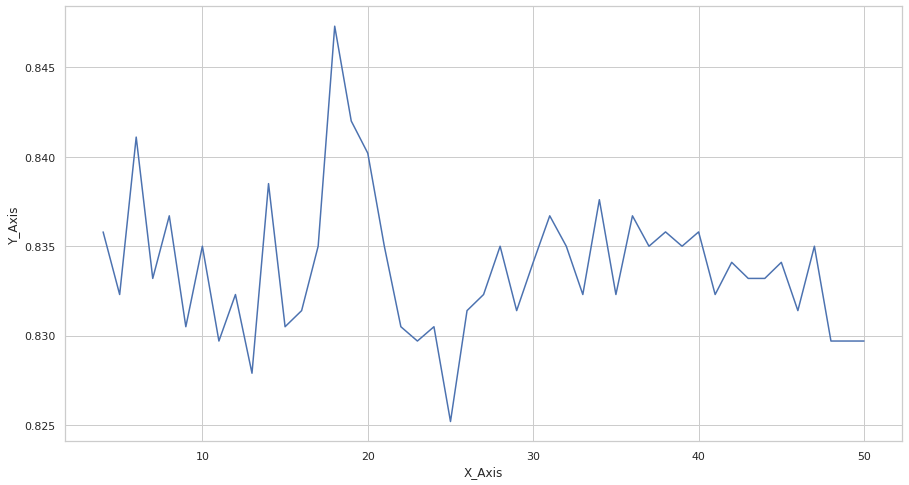

In [172]:
#TRYING DIFFERENT NEIGHBOURS
xAxis = list()
yAxis = list()
for i in range(4,51,1):
  knn = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 

  #Fit the model
  knn.fit(data_train, label_train)
  xAxis.append(i)
  #Use the model for pridiction
  y_preds = knn.predict(data_test)
  
  #Model evaluation - check the accuracy score
  knn_accuracy = accuracy_score(label_test,y_preds)
  yAxis.append(round(knn_accuracy,4))
  print('Accuracy score for the KNN model with n_neighbors=', i,":",round(knn_accuracy,4))

linedata = pd.DataFrame({'X_Axis' : xAxis,
                         'Y_Axis' : yAxis})
#print(linedata)
#plot the line graph
fig, ax = plt.subplots(figsize=(15,8))
#sns.set_style("ticks")
sns.set_style("whitegrid")
sns.lineplot(x = 'X_Axis',y = 'Y_Axis', data=linedata,ax=ax)

knn_accuracy = max(yAxis)

**5.2 Bayes**

In [173]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()

bayes.fit(data_train, label_train)

y_pred = bayes.predict(data_test)

In [174]:
from sklearn.metrics import accuracy_score
bayes_accuracy = accuracy_score(label_test, y_pred)
print('Accuracy score for the Bayes model:', bayes_accuracy)

Accuracy score for the Bayes model: 0.6946160635481023


**5.3 So sánh**

In [175]:
model5 = pd.DataFrame({
        'ModelName'         : ['Model 5'],
        'Scaled?'           : ['Yes'],
        'Outliers?'         : ['Yes'],
        'Include Type?'     : ['Yes'],
        'Added Category?'   : ['Yes'],
        'Bayes_score'       : [bayes_accuracy],
        'KNN_score'         : [knn_accuracy]
    })
models = models.append(model5,ignore_index=True)
models.drop_duplicates(subset = None, keep = 'first', inplace = True) 
models.sort_values(by='ModelName', ascending=True)

models

,ModelName,Scaled?,Outliers?,Include Type?,Added Category?,Bayes_score,KNN_score
0,Model 1,No,No,No,No,0.469231,0.482308
1,Model 2,No,No,Yes,Yes,0.726154,0.807700
2,Model 3,No,Yes,No,No,0.453663,0.489800
3,Model 4,No,Yes,Yes,Yes,0.695499,0.815500
4,Model 5,Yes,Yes,Yes,Yes,0.694616,0.847300
